In [1]:
import numpy as np
import random as rnd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

In [91]:
import os 
#El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
#Sobre todo aquellas que nos refieren información sobre el entorno del mismo y nos permiten manipular la estructura de directorios

#Fuente :  https://uniwebsidad.com/libros/python/capitulo-10/modulos-de-sistema

In [92]:
os.listdir('C:/Users/alejandro/Desktop/Poki')

['images', 'images.zip', 'pokemon.csv']

In [93]:
os.listdir('C:/Users/alejandro/Desktop/Poki/images')[:15]

['abomasnow.png',
 'abra.png',
 'absol.png',
 'accelgor.png',
 'aegislash-blade.png',
 'aerodactyl.png',
 'aggron.png',
 'aipom.png',
 'alakazam.png',
 'alomomola.png',
 'altaria.png',
 'amaura.png',
 'ambipom.png',
 'amoonguss.png',
 'ampharos.png']

In [94]:
len(os.listdir('C:/Users/alejandro/Desktop/Poki/images'))

809

Bien , tenemos 809 imagenes de Pokemons y una CSV con informacion y descripciones .

## 1.0  Exploracion 

In [95]:
pokis = pd.read_csv('C:/Users/alejandro/Desktop/Poki/pokemon.csv')

pokis.head(5)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [96]:
pokis.nunique() 
# 809 pokemons en total
# 18 pokemonsde una sola clase 
# 18 pokemons con una 2da clase 

Name     809
Type1     18
Type2     18
dtype: int64

Pero queremos separar los que son de doble tipo en una columna aparte , para evitar confusiones 

In [97]:
def DobleClase(row):
    if row['Type2']=='Sin Type': 
        return row['Type1']
    return '-'.join([row['Type1'], row['Type2'] ])

# " Si en la 2da casilla tenemos un valor Sin Typex , devolvenos la informacion de la primer casilla. Si no , devolvenos los 2 valores "

In [98]:
pokis['Type2'].fillna('Sin Type', inplace=True) # Cambiamos los valores Nulls a None
pokis['Type'] = pokis.apply(lambda row: DobleClase(row), axis=1)
pokis.head(10)

,Name,Type1,Type2,Type
0,bulbasaur,Grass,Poison,Grass-Poison
1,ivysaur,Grass,Poison,Grass-Poison
2,venusaur,Grass,Poison,Grass-Poison
3,charmander,Fire,Sin Type,Fire
4,charmeleon,Fire,Sin Type,Fire
5,charizard,Fire,Flying,Fire-Flying
6,squirtle,Water,Sin Type,Water
7,wartortle,Water,Sin Type,Water
8,blastoise,Water,Sin Type,Water
9,caterpie,Bug,Sin Type,Bug


In [105]:
pokis.nunique() # Tiramos un unique nuevamente y ahora tenemos 159 convinaciones posibles de doble tipo

Name     809
Type1     18
Type2     19
Type     159
dtype: int64

Vamos a testear cuantos de doble tipo tenemos en nuestro set :

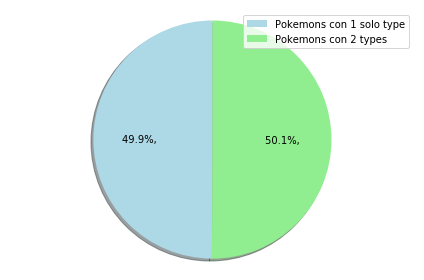

In [135]:
labels = ['Pokemons con 1 solo type', 'Pokemons con 2 types'] # Seleccionamos los labels 
sizes = [pokis['Type2'].value_counts()['Sin Type'], 
         pokis['Type2'].count() - pokis['Type2'].value_counts()['Sin Type']] # Indicamos que queremos graficar 

colors = ['lightblue', 'lightgreen']

patches, texts, _ = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%, ', textprops={'color':"black"}, shadow = 1 )
plt.legend(patches, labels, loc="best") # " https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie "
plt.axis('equal')
plt.tight_layout()
plt.show()

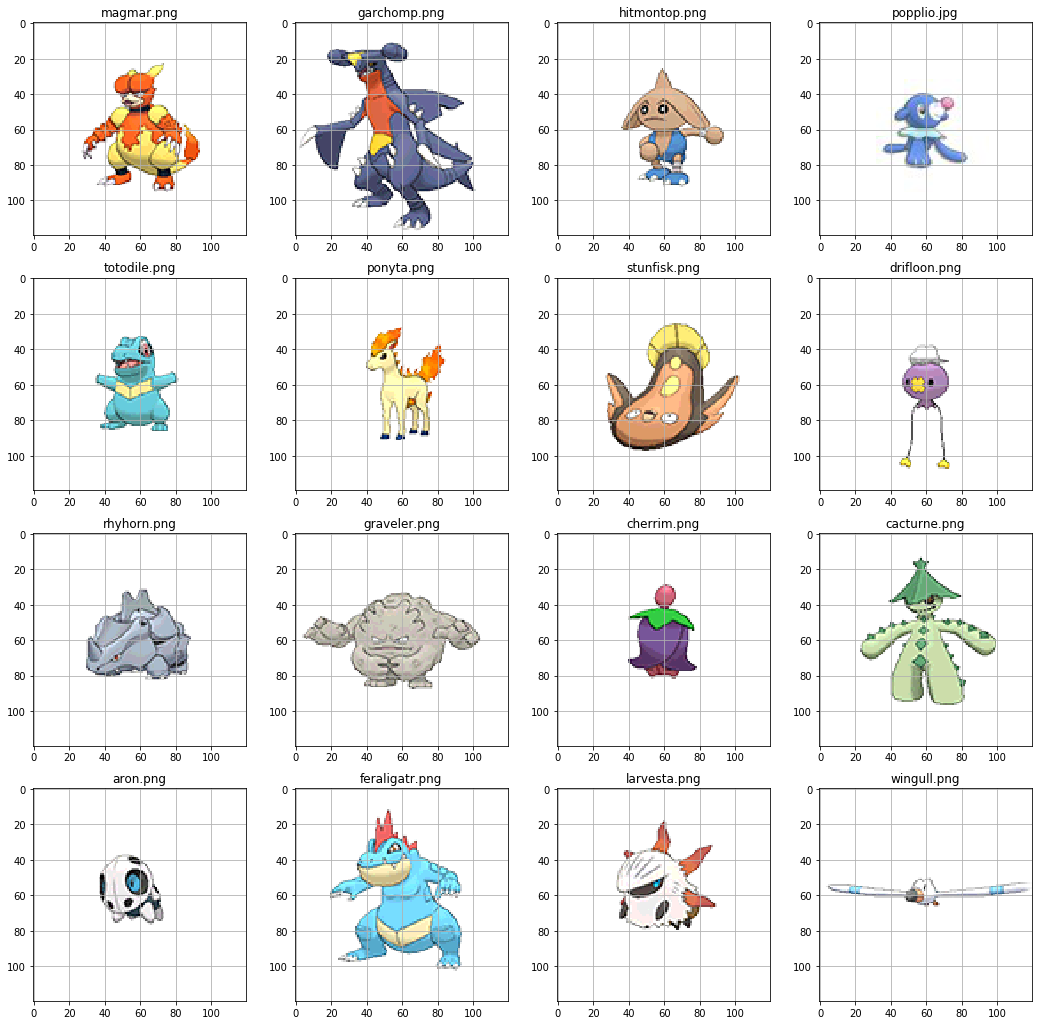

In [146]:
fig = plt.figure(16, figsize=(18, 18))

for i, pic in enumerate(rnd.sample(os.listdir('C:/Users/alejandro/Desktop/Poki/images'), 16)):
    a = fig.add_subplot(4, 4, i + 1)
    img = plt.imshow(mpimg.imread('C:/Users/alejandro/Desktop/Poki/images/{}'.format(pic)))
    a.set_title(pic)
    plt.grid(None)

plt.show()